
# NLP Essentials Project

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/NLP/STUDENT_NLP_Projectv2'

Mounted at /content/drive


# Sentiment Analysis Online Movie Reviews

### Project Scenario

In a recent [market research](https://newsroom.ibm.com/IBMs-Global-AI-Adoption-Index-2021?lnk=ushpv18ai3) by IBM, almost one-third of IT professionals surveyed globally say their business is using Artificial Intelligence (AI). The survey reported almost half of businesses today are now using applications powered by natural language processing (NLP).

NLP, specifically 'Sentiment Analysis', can provide a key business advantage by abstracting from unstructured text data the negative or positive attitude of the writer/author. This crucuial insight can help turn web data into market intelligence for the business.

A request has been received from the web development department to add 'Sentiment Analysis' feature to a movie reviews page.

The insights from the sentiment analysis will be used to promote more popular movies.  

In this project, you are tasked to create a prototype NLP project that is capable of 'Sentiment Analysis' from movie reviews.

---

In this assignment, you will be working **individually** on the 'Sentiment Analysis' project.

Complete ALL THE TASKS ( From 1 to 7). You may refer to online documentation (e.g. keras, pandas, etc) for help on syntax.

`No copying of codes wholesale is allowed.`

Use a random_state = 42 where appropriate.

Broadly, this project will require the following steps:

1. Importing Various Modules.
1.Problem scoping.
>1.1. Defining problem statement using 4Ws (Who, What, Where, Why) problem canvas from the project scenario.

2.Data acquisition and Data exploration.
>2.1.Importing various modules.

>2.2.Preparing the data.

>>2.2.1. Preprocess Text.

>>2.2.2. Perform image pre-processing and data augmentation.

>>2.2.3.Split it into train, validate, and test datasets.

>>2.2.4. Perform Feature Extraction Using TF-IDF.

3.Modelling.

>3.1. Create the model - Build a model based on Build a model based on Neural Network.





# Part 1 : Data loading and preliminary inspection

The data for this project will be from `polarity dataset 2.0` collected by [Bo Pang and colleagues from Cornell Univeristy](http://www.cs.cornell.edu/people/pabo/movie-review-data/).

*(This dataset will be provided to you.)*

It was used for the paper published in 2002 called Thumbs up?
Sentiment Classification using Machine Learning Techniques, by Bo Pang, Lilian Lee, and Shivakumar Vaithyanathan.


Using google colab, load the given dataset according the folder structure.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/NLP/STUDENT_NLP_Projectv2'

### Folder Structure
**Reminder**

In your google drive folder ensure you have the following directory structure set up:
```
Directory Structure In Google Drive:
MyDrive
|
+-- ITE
     |
     +--NLP
        |
        +--Project
          |
          +data
              |
              +--pos
              |
              +--neg
         
```            


## Task 2: Data acquisition and Data exploration.

Collect an additional 30 samples of positive reviews and 30 samples of negative reviews from this website:
https://www.rottentomatoes.com/browse/movies_in_theaters/sort:newest?page=1


Add these to the given dataset respectively.

The final dataset should have 1000 positive reviews and 1000 negative reviews.


(-0.5, 1691.5, 1753.5, -0.5)

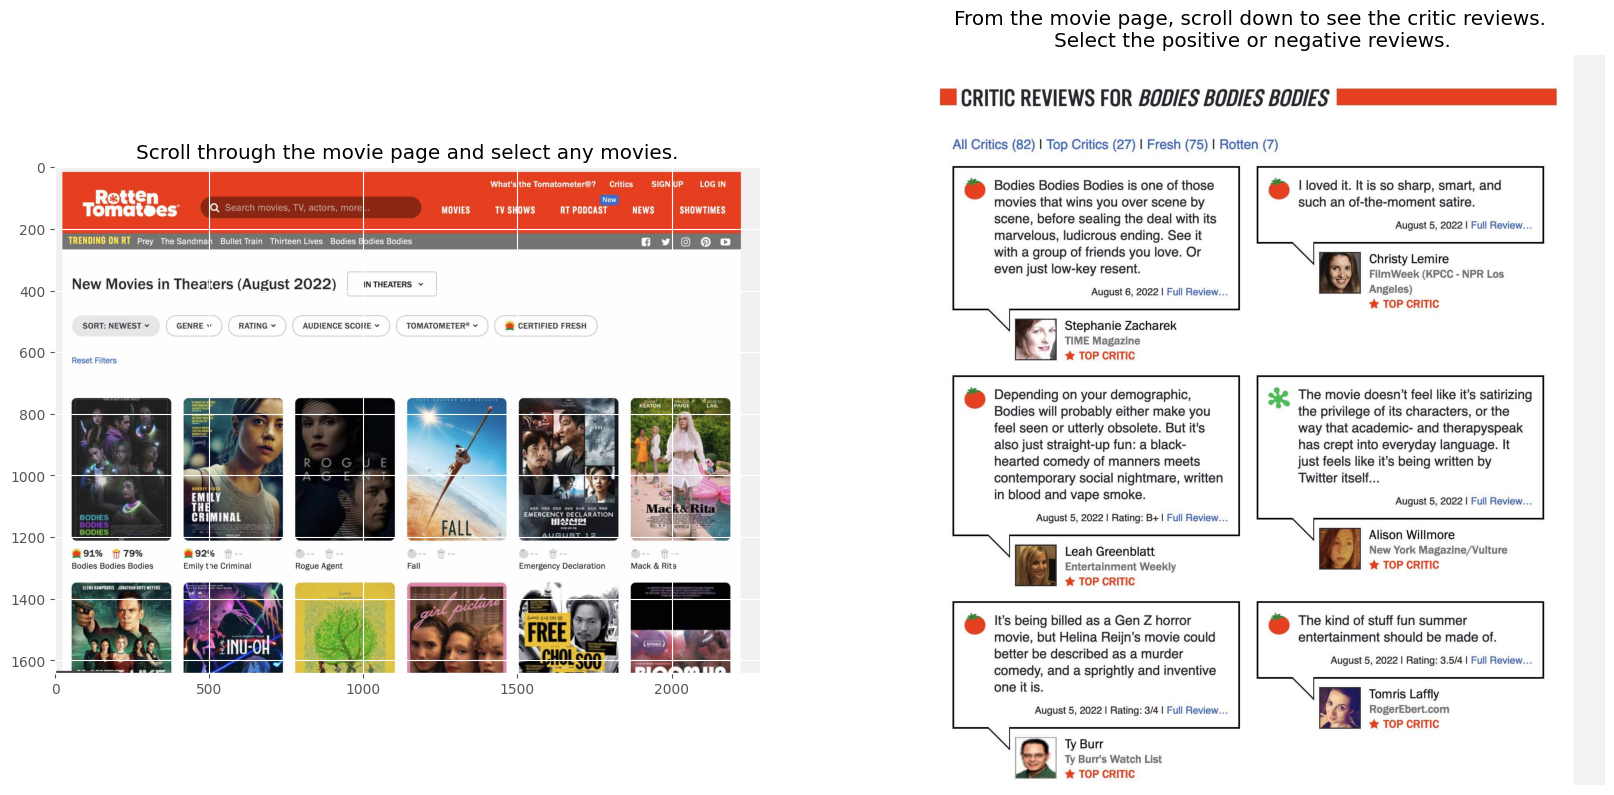

In [ ]:
#@markdown { "tags": "hide-ouput" }

import matplotlib.pyplot as plt
f, ax=plt.subplots(1,2, figsize=(20,20))
pic_name1 = '/content/drive/MyDrive/NLP/STUDENT_NLP_Projectv2/ReviewsScreenCapture.jpg'
pic_name2= '/content/drive/MyDrive/NLP/STUDENT_NLP_Projectv2/MoviesPage.jpg'

ax[1].title.set_text("From the movie page, scroll down to see the critic reviews. \nSelect the positive or negative reviews.")
ax[1].imshow(plt.imread(pic_name1))

ax[0].title.set_text("Scroll through the movie page and select any movies.")
ax[0].imshow(plt.imread(pic_name2))
plt.axis('off')


In [ ]:
# The following codes in this cell are provided as a guide.

import os

def read_in(folder):
    files = os.listdir(folder)
    a_dict = {}
    for a_file in sorted(files):
        if not a_file.startswith("."):
            with open(folder + a_file, encoding='ISO-8859-1', errors ='ignore') as f:
                file_id = a_file.split(".")[0].strip()
                a_dict[file_id] = f.read()
            f.close()
    return a_dict

Print out the number of reviews in positive and negative dictionaries, as well as the very first positive and very first negative reviews in the dictionaries.

In [ ]:
# The following codes in this cell are provided as a guide

folder= '/content/drive/MyDrive/NLP/STUDENT_NLP_Projectv2/data/'
pos_dict = read_in(folder + "pos/")
print(len(pos_dict))
print(pos_dict.get(next(iter(pos_dict))))
neg_dict = read_in(folder + "neg/")
print(len(neg_dict))
print(neg_dict.get(next(iter(neg_dict))))

1000
films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this seems almos

## Task 2.1: Importing various modules - Data Cleansing

Import the relevant NLTK libraries.

In [ ]:
# The following codes in this cell are provided as a guide

import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Task 2.1: Importing various modules - Add More Stops Words To NLTK

Add the following to stopwords:
1. '@'
2. '#'
3. 'http'
4. ':'

In [ ]:
stop = nltk.corpus.stopwords.words('english')
# Add a few more stop words we would like to remove here
##Complete the code below## DONE
stop.append('@')
stop.append('#')
stop.append('http')
stop.append(':')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Task 2.2.2 : Process Text - Tokenize, Remove Punctuation, Lemmatize

Complete the following functions.

In [ ]:
import string

# tokenize text using nltk.
def tokenize(text):
  tokenized_text = nltk.word_tokenize(text)

  return tokenized_text

#remove punctuation from text using 'string.punctation'
def remove_punctuation(text):
  ##Complete the code below##
  tokenized_text = [word for word in text if word not in string.punctuation]

  return tokenized_text

#lemmatize sentence using 'nltk.stem.PorterStemmer'
##Complete the code below##
def lemmatize(sentence):
    porter = nltk.stem.PorterStemmer()
    lemmatized_sentence = [porter.stem(word) for word in sentence]

    return lemmatized_sentence


def process_text(text):
    tokenized_text=tokenize(text)
    tokenized_text=remove_punctuation(tokenized_text)
    lemmas=lemmatize(tokenized_text)

    processed = [w.lower() for w in lemmas if w not in stop]
    return processed


## Task 3: Randomly Combine Review Texts From Positive & Negative Reviews Data Sets.

Preprocessed texts to remove punctuation, remove stop words andlemmatized the text.

Combine all these texts into a single dataset where each preprocessed review and its label are in a tuple:

`data=[('preprocessed review text', label), ('preprocessed review text', label) ...]`

**Example:**

* ('this movie is nice', 1)
* ('this movie is lousy',0)

Label for positive and negative review:
* `Positive review is given 1.`
* `Negative review is given 0.`


In [ ]:
import random
from tqdm import tqdm
def prepare_data(pos_dict, neg_dict):
    data=[]
    originalText=[]

    for each_dict in [pos_dict, neg_dict]:
      ##Complete the code below##. (done)
      label = 1 if each_dict == pos_dict else 0

      for id in tqdm(each_dict,desc='Reviews Progressed Bar'):
        ##Complete the code below##. (done)
        preprocessed_text = process_text(each_dict[id])
        preprocessed_text = ' '.join(preprocessed_text)
        data.append((preprocessed_text, label))
        originalText.append(each_dict[id])
        ##Complete the code below##.


    random.seed(42)
    random.shuffle(data)
    texts = []
    labels = []
    for item in data:
        texts.append(item[0])
        labels.append(item[1])
    return originalText,texts, labels

originalText,texts, labels = prepare_data(pos_dict, neg_dict)

print(len(texts), len(labels))
print(texts[0])

Reviews Progressed Bar: 100%|██████████| 1000/1000 [00:16<00:00, 60.08it/s]

2000 2000
central focu michael winterbottom 's `` welcom sarajevo `` sarajevo citi sieg differ effect charact unfortun enough stuck prove backdrop stunningli realiz stori refreshingli stray mythic portent `` platoon `` racial tumultuos risibl `` walk dead `` ting schmaltzi `` schindler 's list `` two lead stephen dillan report emira nusev orphan plight identifi extrem believ one moment involv ring fals question went right question went wrong one film fail provid polit overview war progress dillan charact report american plane depart sarajevo depart 's assort high-profil support actor rang woodi harrelson yanke report `` `` liquor cigarrett marisa tomei huggabl children 's aid somesuch incap rise abov sketchi charact albeit strive interrupt use authent war footag somewhat hamper rest film make fiction charact seem powerless comparison still winterbottom eschew mawkish flashi frantic edit imagin use music 's plu becaus doe n't toy emot sentiment bland want us know war one victori sweet h

### Task 2.2.3: Split Dataset Into Train Test Sets.

Split the texts into:

1. 80% for training.
2. 20% for testing.

In [ ]:

def split(texts, labels, proportion):
    train_data = []
    train_targets = []
    test_data = []
    test_targets = []
    ##Complete the code below##
    split_point = int(len(texts) * proportion)
    train_data = texts[:split_point]
    train_targets = labels[:split_point]
    test_data = texts[split_point:]
    test_targets = labels[split_point:]





    return train_data, train_targets, test_data, test_targets

train_data, train_targets, test_data, test_targets = split(texts, labels, 0.8)

print(len(train_data)) # 1600?
print(len(train_targets)) # 1600?
print(len(test_data)) # 400?
print(len(test_targets)) # 400?
print(train_targets[:10]) # print out the targets for the first 10 training reviews
print(test_targets[:10]) # print out the targets for the first 10 test reviews

1600
1600
400
400
[1, 0, 1, 1, 0, 0, 0, 0, 1, 0]
[0, 1, 1, 0, 0, 1, 0, 1, 1, 1]


In [ ]:
# The following codes in this cell are provided as a guide

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
# The following codes in this cell are provided as a guide

count_vect = CountVectorizer(analyzer = "word", strip_accents=None, tokenizer = None, \
                             preprocessor = None, stop_words = None, max_features = 500)


train_data_features = count_vect.fit_transform(train_data)
test_data_features = count_vect.transform(test_data)

# Check the dimensionality
print(train_data_features.shape)
print(test_data_features.shape)

(1600, 500)
(400, 500)


The max features for CountVectorizer function has been set to 500. The parameter can be adjusted to improve results.

In [ ]:
print(train_data_features[:11])

  (0, 269)	1
  (0, 67)	1
  (0, 99)	1
  (0, 113)	1
  (0, 63)	5
  (0, 453)	1
  (0, 120)	1
  (0, 335)	1
  (0, 346)	1
  (0, 411)	1
  (0, 470)	1
  (0, 89)	1
  (0, 451)	1
  (0, 233)	1
  (0, 137)	1
  (0, 39)	1
  (0, 304)	4
  (0, 274)	1
  (0, 213)	1
  (0, 339)	2
  (0, 358)	1
  (0, 496)	2
  (0, 152)	2
  (0, 141)	1
  (0, 336)	1
  :	:
  (10, 271)	2
  (10, 129)	1
  (10, 342)	2
  (10, 357)	1
  (10, 439)	1
  (10, 232)	1
  (10, 122)	1
  (10, 241)	1
  (10, 379)	2
  (10, 318)	1
  (10, 455)	2
  (10, 192)	1
  (10, 23)	1
  (10, 248)	2
  (10, 136)	1
  (10, 189)	1
  (10, 424)	2
  (10, 215)	1
  (10, 279)	1
  (10, 405)	1
  (10, 412)	1
  (10, 121)	1
  (10, 153)	1
  (10, 294)	1
  (10, 351)	1


In [ ]:
count_vect.get_feature_names_out()[321]

'plan'

# Part 2: Perform AI Natural Language Inference


## Task 2.2.4: Feature Extraction Using TF-IDF

Perform normalization of bag of words using the TfidfTransformer. Use it the same way as above.

Create a class, and use the .fit_transform() method with the bag of words as your argument to create your TFIDF.


In [ ]:
tfidfier = TfidfTransformer()
tfidf = tfidfier.fit_transform(train_data_features)##Complete the code##
tfidf_test = tfidfier.transform(test_data_features)##Complete the code##

In [ ]:
# The following codes in this cell are provided as a guide

import numpy as np
X_train = tfidf.toarray()
y_train = np.array(train_targets.copy())
X_test = tfidf_test.toarray()
y_test = np.array(test_targets.copy())

In [ ]:
# The following codes in this cell are provided as a guide
# Convert a vector with integers representing different categories
# into binary form: [0,1,0,0 ... ]
from tensorflow.keras.utils import to_categorical
y_train= to_categorical(y_train-y_train.min())
y_test= to_categorical(y_test-y_test.min())

In [ ]:
y_train[0]

array([0., 1.])

In [ ]:
np.unique(y_train[:,1], return_counts=True)

(array([0., 1.]), array([798, 802]))

In [ ]:
y_test[-10:]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

## Task 5: Create Model Using Neural Networks

Create a suitable neural network and train it.


In [ ]:
from keras.models import Sequential
from keras.losses import sparse_categorical_crossentropy
from keras.losses import categorical_crossentropy
from keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense


model = Sequential() ##Complete the code ##
model.add(Dense(320,activation= 'relu',##Complete the code##,
                input_dim=500))

model.add(Dense(2,activation= 'softmax'))

model.compile(loss=categorical_crossentropy, optimizer=SGD(learning_rate=0.001, momentum=0.9, nesterov=True), metrics=['acc'])##Complete the code##)

history=model.fit(X_train, y_train,
          epochs=100,
          batch_size=16,
          validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.4662 - loss: 0.6959 - val_acc: 0.4975 - val_loss: 0.6943
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.4682 - loss: 0.6945 - val_acc: 0.5275 - val_loss: 0.6924
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.5260 - loss: 0.6919 - val_acc: 0.5475 - val_loss: 0.6905
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5578 - loss: 0.6898 - val_acc: 0.5650 - val_loss: 0.6888
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.6077 - loss: 0.6872 - val_acc: 0.5975 - val_loss: 0.6867
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6112 - loss: 0.6850 - val_acc: 0.5975 - val_loss: 0.6849
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.6430 - loss: 0.6833 - val_acc: 0.6350 - val_loss: 0.6830
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6984 - loss: 0.6796 - val_acc: 0.6450 - val_loss: 0.6810
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 

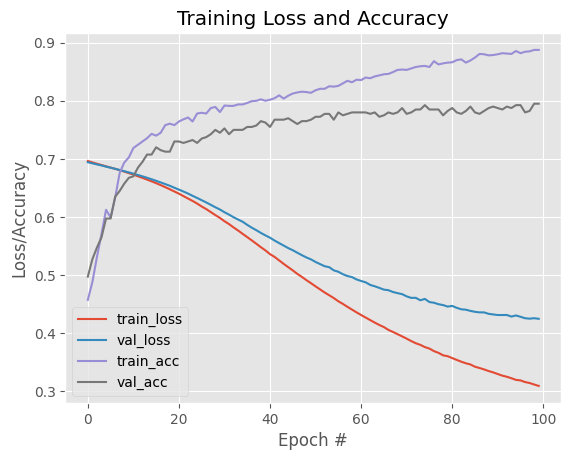

In [ ]:
sanum_epochs=100

def plot_graphs(H, metric):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, num_epochs), H.history["acc"], label="train_acc")
  plt.plot(np.arange(0, num_epochs), H.history["val_acc"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #" )
  plt.ylabel("Loss/Accuracy" )
  plt.legend()
  plt.savefig("model history")
  plt.show( )
plot_graphs(history,'acc')


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predicted = model.predict(X_test)
predicted_label=[np.argmax(each) for each in np.array(predicted)]
y_test_label=[np.argmax(each) for each in np.array(y_test)]
print("\nConfusion matrix:")
print(confusion_matrix(y_test_label, predicted_label))
print(classification_report(y_test_label, predicted_label))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Confusion matrix:
[[151  51]
 [ 31 167]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       202
           1       0.77      0.84      0.80       198

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.79       400
weighted avg       0.80      0.80      0.79       400



## Task 6: Test For Unseen Text

Use the trained model to make predictions on totally unseen text.

In [ ]:
#use the following text for prediction
neg_text="Just when you think you’ve seen the worst movie ever made,\
along comes this pile of toxic waste."

pos_text='This is going to go down as one of 2022’s most entertaining motion pictures.'


In [ ]:
def test_model(pos_text,neg_text,count_vect,tfidfier, model):
  for text in [pos_text,neg_text]:

    processed_NewText=' '.join(process_text(text))

    print("\nNew Text To Predict:\n","\""+text+"\"")

    text_for_prediction=tfidfier.transform(count_vect.transform([processed_NewText]))

    result=model.predict(text_for_prediction)

    if np.argmax(result) == 0:
      print()
      print("Predicted Sentiment: NEGATIVE")
    else:
      print()
      print("Predicted Sentiment: POSITIVE")

test_model(pos_text,neg_text,count_vect,tfidfier, model)


New Text To Predict:
 "This is going to go down as one of 2022’s most entertaining motion pictures."
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step

Predicted Sentiment: POSITIVE

New Text To Predict:
 "Just when you think you’ve seen the worst movie ever made,along comes this pile of toxic waste."
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step

Predicted Sentiment: NEGATIVE


## Task 7: Apply Cosine Similarity To Find Similar Texts

Based on the given unseen positive and negative text previously, find the top most similar sentences from the training dataset.

Reminder: Please note that you have to use the same fitted "tfidf" model to perform feature extraction of your texts.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

neg_text="Just when you think you’ve seen the worst movie ever made, \
along comes this pile of toxic waste."

pos_text='This is going to go down as one of 2022’s most entertaining motion pictures.'

def findSimiarlTextModel(pos_text, neg_text, count_vect, tfidfier, model):
    for text in [pos_text, neg_text]:
        # Ensure text is preprocessed correctly
        processed_NewText = ' '.join(process_text(text))

        print("\nNew Text To Predict:\n", "\"" + text + "\"")

        # Vectorize text
        t = tfidfier.transform(count_vect.transform([processed_NewText]))

        text_for_prediction = t.toarray()

        # Compute cosine similarity
        vals = cosine_similarity(text_for_prediction, X_train)

        print(vals, type(vals), vals.shape)

        # Find the most similar text index
        best_match_idx = vals.reshape(-1).argsort()[-1]  # Fix: Ensure correct reshaping

        print(best_match_idx)  # Index of best match
        print(vals[0, best_match_idx])  # Fix: Correct way to get similarity score
        print(originalText[best_match_idx])  # Fix: Retrieve correct text

findSimiarlTextModel(pos_text,neg_text,count_vect,tfidfier, model)


New Text To Predict:
 "This is going to go down as one of 2022’s most entertaining motion pictures."
[[0.05325306 0.10856722 0.05793383 ... 0.03982428 0.06803217 0.10927717]] <class 'numpy.ndarray'> (1, 1600)
488
0.4803056687359135
it has happened again . 
a movie that is well scripted , well acted , and well directed . 
it is involving , suspenseful . . . 
it even has an unexpected twist at the end that packs a punch like a blow to the solar plexus . 
but in order to accept its premise one must also accept a spiritual lie . 
the sixth sense is that movie . 
starring bruce willis ( armageddon ) as a child psychologist and haley joel osment ( forrest gump ) as a troubled youngster , the sixth sense is more spooky than scary , though it does contain disturbing images designed to startle . 
eight-year-old cole sear ( osment ) sees dead people . 
not just in dreams . 
and not just as lifeless bodies . 
he sees them walking around like regular people . 
and he sees them all the time . 
dr 

In [ ]:
def findSimiarlTextModel(pos_text, neg_text, count_vect, tfidfier, model):
    for text in [pos_text, neg_text]:
        # Process the input text
        processed_NewText = ' '.join(process_text(text))

        print("\nNew Text To Predict:\n", "\"" + text + "\"")

        # Convert the processed text to TF-IDF vector
        t = tfidfier.transform(count_vect.transform([processed_NewText]))
        text_for_prediction = t.toarray()

        # Compute cosine similarity with training dataset
        vals = cosine_similarity(text_for_prediction, X_train)

        print(vals, type(vals), vals.shape)
        vals = vals.reshape(-1)

        # Find the most similar sentence in the training dataset
        most_similar_index = vals.argsort()[-1]  # Get index of highest similarity
        similarity_score = vals[most_similar_index]

        print(f"\nMost Similar Text Index: {most_similar_index}")
        print(f"Similarity Score: {similarity_score}")
        print(f"\nMost Similar Training Sentence:\n{originalText[most_similar_index]}")

findSimiarlTextModel(pos_text, neg_text, count_vect, tfidfier, model)



New Text To Predict:
 "This is going to go down as one of 2022’s most entertaining motion pictures."
[[0.05481995 0.11019287 0.05965012 ... 0.0410085  0.07004912 0.11177612]] <class 'numpy.ndarray'> (1, 1600)

Most Similar Text Index: 488
Similarity Score: 0.48175189813802965

Most Similar Training Sentence:
it has happened again . 
a movie that is well scripted , well acted , and well directed . 
it is involving , suspenseful . . . 
it even has an unexpected twist at the end that packs a punch like a blow to the solar plexus . 
but in order to accept its premise one must also accept a spiritual lie . 
the sixth sense is that movie . 
starring bruce willis ( armageddon ) as a child psychologist and haley joel osment ( forrest gump ) as a troubled youngster , the sixth sense is more spooky than scary , though it does contain disturbing images designed to startle . 
eight-year-old cole sear ( osment ) sees dead people . 
not just in dreams . 
and not just as lifeless bodies . 
he sees t

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def findSimilarTextModel(pos_text, neg_text, count_vect, tfidfier, model, X_train, originalText):
    for text in [pos_text, neg_text]:
        # Preprocess the text
        processed_NewText = ' '.join(process_text(text))

        print("\nNew Text To Predict:\n", "\"" + text + "\"")

        # Convert the processed text to TF-IDF representation
        text_vectorized = tfidfier.transform(count_vect.transform([processed_NewText]))
        text_for_prediction = text_vectorized.toarray()

        # Compute cosine similarity between input text and training data
        vals = cosine_similarity(text_for_prediction, X_train)

        print(vals, type(vals), vals.shape)

        # Find the index of the most similar text
        best_match_idx = np.argmax(vals)
        best_match_score = vals[0, best_match_idx]

        print(best_match_idx)  # Index of best match
        print(best_match_score)  # Cosine similarity score
        print(originalText[best_match_idx])  # The most similar text from dataset



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

import numpy as np


neg_text="Just when you think you’ve seen the worst movie ever made,\
along comes this pile of toxic waste."

pos_text='This is going to go down as one of 2022’s most entertaining motion pictures.'

def findSimiarlTextModel(pos_text,neg_text,count_vect,tfidfier, model):
  for text in [pos_text,neg_text]:

    processed_NewText= ' '.join(process_text(text))

    print("\nNew Text To Predict:\n","\""+text+"\"")

    t=tfidfier.transform(count_vect.transform([processed_NewText]))

    text_for_prediction=t.toarray()

    vals=cosine_similarity(text_for_prediction,X_train)



    print(vals, type(vals), vals.shape)
    vals=vals.reshape(-1) # Reshape to a 1D array for easier indexing
    print(vals.argsort()[-1])  # Get the index of the most similar text
    print(vals[vals.argsort()[-1]])  # Get the cosine similarity score
    print(originalText[vals.argsort()[-1]])  # Print the most similar text
    print(vals[vals.argsort()[-2]])  # Get the cosine similarity score of the second most similar text
    print(originalText[vals.argsort()[-2]])  # Print the second most similar text

findSimiarlTextModel(pos_text,neg_text,count_vect,tfidfier, model)


New Text To Predict:
 "This is going to go down as one of 2022’s most entertaining motion pictures."
[[0.05481995 0.11019287 0.05965012 ... 0.0410085  0.07004912 0.11177612]] <class 'numpy.ndarray'> (1, 1600)
488
0.48175189813802965
it has happened again . 
a movie that is well scripted , well acted , and well directed . 
it is involving , suspenseful . . . 
it even has an unexpected twist at the end that packs a punch like a blow to the solar plexus . 
but in order to accept its premise one must also accept a spiritual lie . 
the sixth sense is that movie . 
starring bruce willis ( armageddon ) as a child psychologist and haley joel osment ( forrest gump ) as a troubled youngster , the sixth sense is more spooky than scary , though it does contain disturbing images designed to startle . 
eight-year-old cole sear ( osment ) sees dead people . 
not just in dreams . 
and not just as lifeless bodies . 
he sees them walking around like regular people . 
and he sees them all the time . 
dr

---

**End of Project**

---